# Exploratory data Analysis

In [1]:
#libraries importation 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
#the data is impoted and pre processed in the data.ipynb file ,
data=pd.read_csv("./data/clean_casablanca_weather_data.csv",parse_dates=['time'],index_col='time')
data.head()

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
time,,,,,,,,
2000-01-01,11.2,6.0,16.4,0.0,NaN,3.7,37.0,1014.1
2000-01-02,11.8,5.8,18.0,0.0,NaN,5.4,37.0,1014.1
2000-01-03,12.8,5.9,17.4,0.0,NaN,4.5,37.0,1014.1
2000-01-04,13.8,10.0,17.5,0.0,NaN,3.1,37.0,1014.1
2000-01-05,11.9,7.0,18.0,0.0,NaN,5.0,37.0,1014.1


## plot the time serie ( avg , min , max)

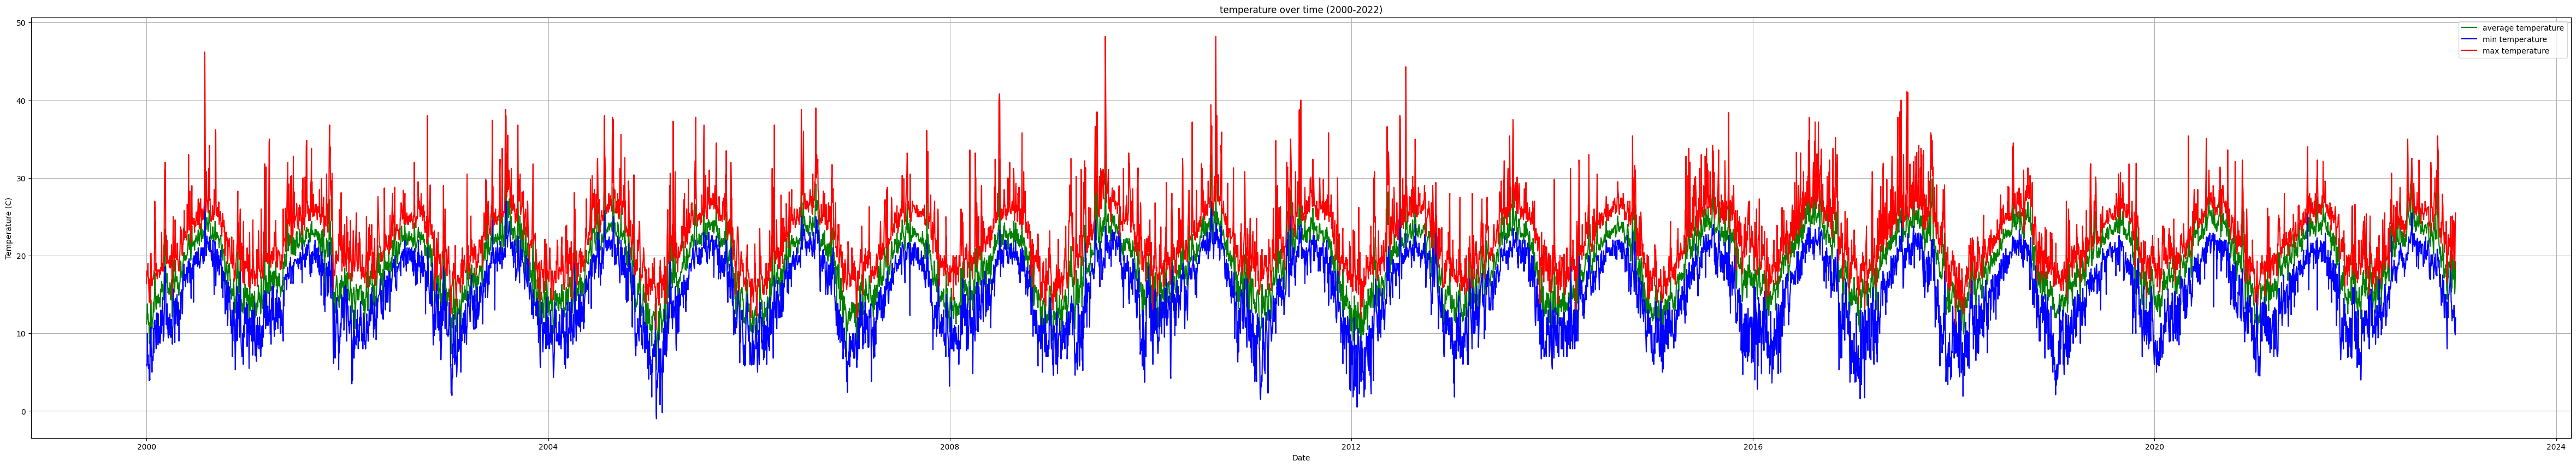

In [3]:
plt.figure(figsize=(60,10))
plt.plot(data['tavg'],label="average temperature", color='green')
plt.plot(data['tmin'],label="min temperature",color='blue')
plt.plot(data['tmax'],label="max temperature",color='red')

plt.title('temperature over time (2000-2022)')

plt.xlabel('Date')
plt.ylabel('Temperature (C)')

plt.legend(loc='best')
plt.grid(True)
plt.show()

## Seasonal Decomposition

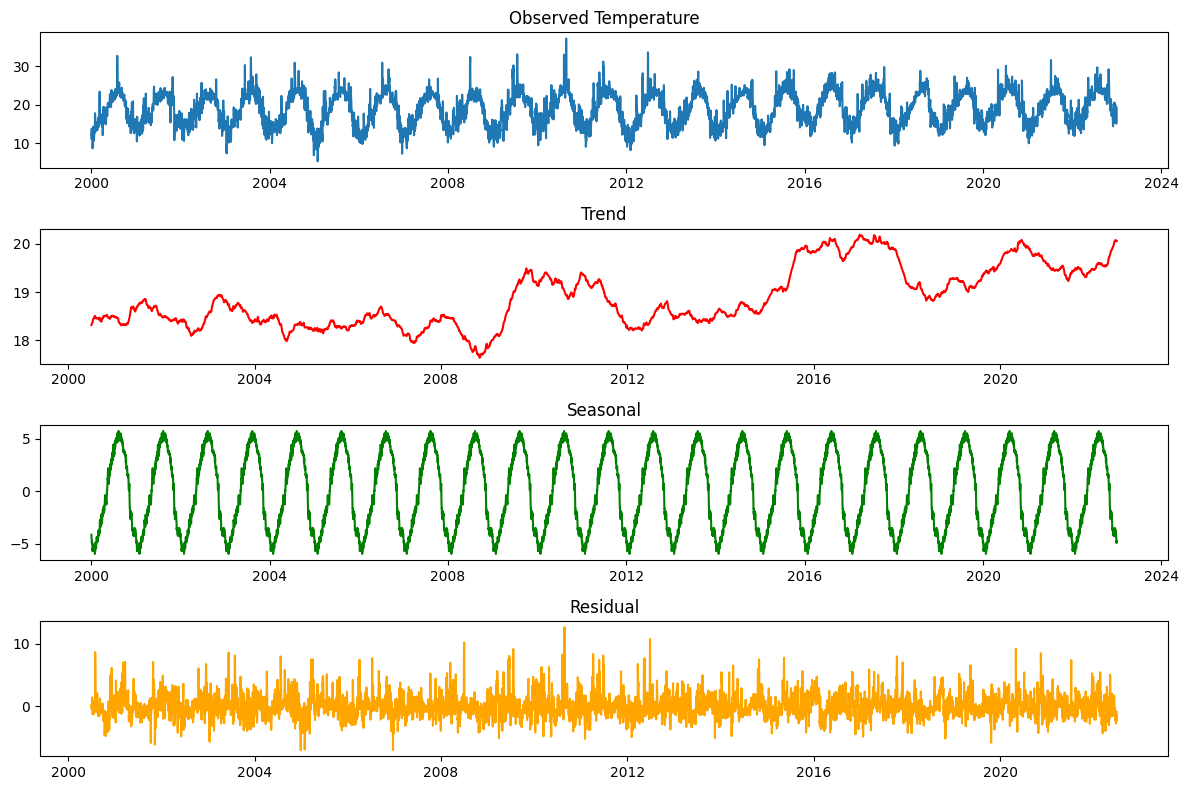

In [4]:

decomposition=seasonal_decompose(data['tavg'],model='additive', period=365) # daily data 

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Temperature')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='orange')
plt.title('Residual')
plt.tight_layout()
plt.show()

## Statistical Testing: Augmented Dickey-Fuller (ADF) Test for Stationarity

In [5]:
result= adfuller(data['tavg'].dropna())

print('ADF Statistics: ', result[0])
print('p-value: ',result[1])

if result[1]<=0.05:
    print("The series is likely stationary (reject H0).")
else:
    print("The series is likely non-stationary (fail to reject H0).")

ADF Statistics:  -6.253008743034993
p-value:  4.4071067939584065e-08
The series is likely stationary (reject H0).


# Model Selection 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import root_mean_squared_error


In [7]:
temperature=data['tavg']

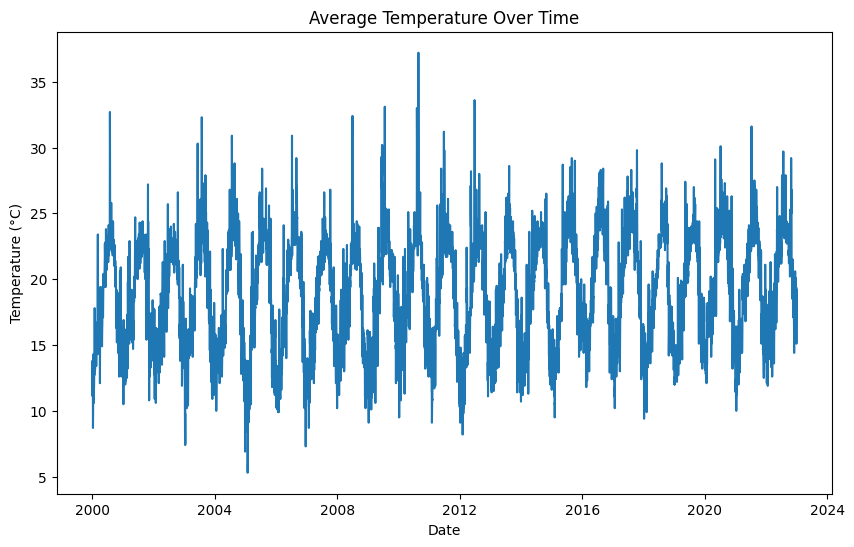

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(temperature)
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

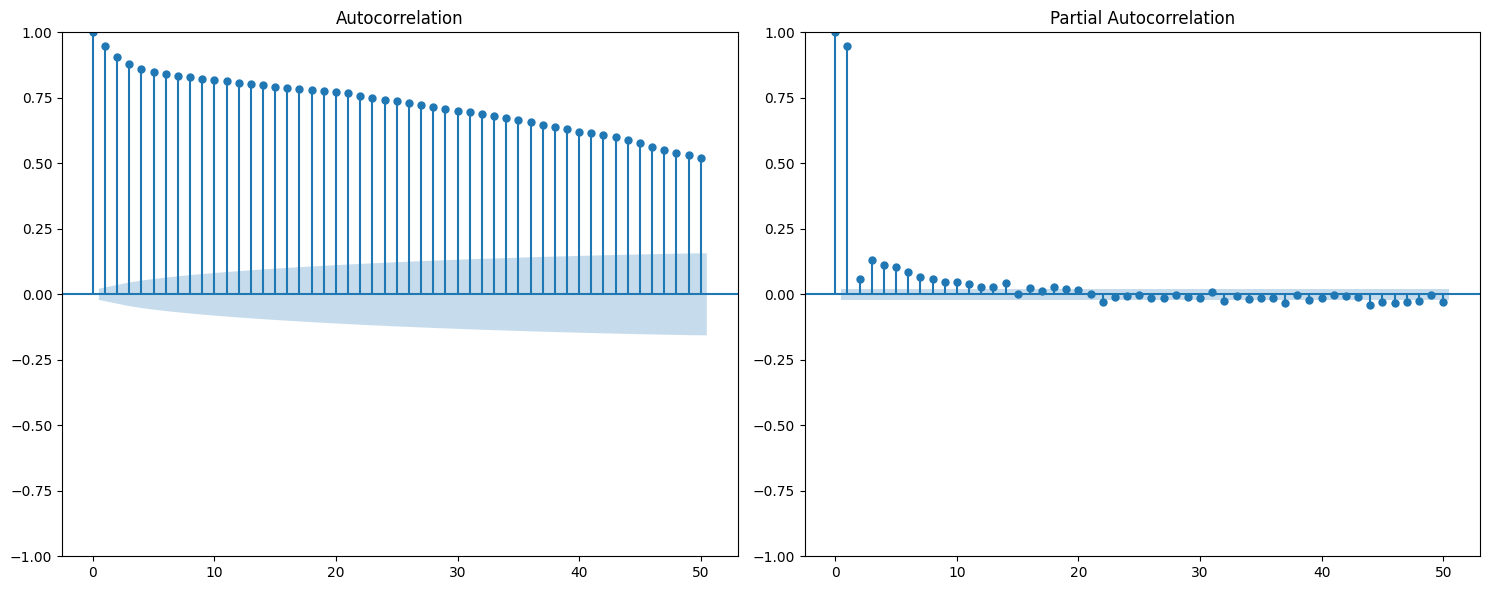

In [9]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plot_acf(temperature,lags=50,ax=plt.gca())

plt.subplot(122)
plot_pacf(temperature,lags=50,ax=plt.gca())
plt.tight_layout()
plt.show()

C:\Users\sohai\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sohai\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sohai\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


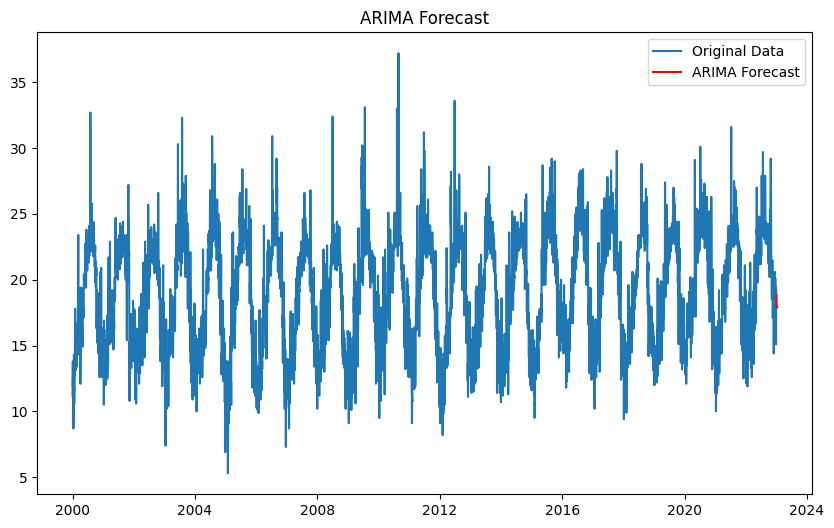

ARIMA RMSE: 1.6332240096354245


In [10]:
# Fit ARIMA model (example: p=1, d=0, q=1)
arima_model = ARIMA(temperature, order=(2, 0, 3))
arima_fit = arima_model.fit()

# Make predictions
arima_forecast = arima_fit.forecast(steps=10)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(temperature, label='Original Data')
plt.plot(pd.date_range(temperature.index[-1], periods=11, freq='D')[1:], arima_forecast, label='ARIMA Forecast', color='red')
plt.legend(loc='best')
plt.title('ARIMA Forecast')
plt.show()

# Evaluate ARIMA Model (using RMSE for comparison)
arima_rmse = root_mean_squared_error(temperature[-10:], arima_forecast)
print(f'ARIMA RMSE: {arima_rmse}')


In [ ]:
# Fit SARIMA model (example: P=1, D=1, Q=1, S=365 for yearly seasonality)
sarima_model = SARIMAX(temperature, order=(1, 0, 1), seasonal_order=(2, 1, 3, 365))
sarima_fit = sarima_model.fit()

# Make predictions
sarima_forecast = sarima_fit.forecast(steps=10)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(temperature, label='Original Data')
plt.plot(pd.date_range(temperature.index[-1], periods=11, freq='D')[1:], sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend(loc='best')
plt.title('SARIMA Forecast')
plt.show()

sarima_rmse = root_mean_squared_error(temperature[-10:], sarima_forecast)
print(f'SARIMA RMSE: {sarima_rmse}')


C:\Users\sohai\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sohai\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
print(f'ARIMA RMSE: {arima_rmse}')
print(f'SARIMA RMSE: {sarima_rmse}')

if arima_rmse < sarima_rmse:
    print("ARIMA model performs better.")
else:
    print("SARIMA model performs better.")
